The motivation behind this exercise is to give a simple demonstration of how we can use pandas and a little bit of numpy and matplotlib and sklearn library to design a simple linear regression model.
I am using a very basic regression model which is based on OLS assumptions.

DATA:
For this particular assignment I have taken dataset from kaggle which is Kings county housing price dataset. This data set has 20 attributes and 21613 rows. 

Target Variable: Price(Which is the house Price) --- Continuous Variable

Predictor variables: 
1)Sqft_living - The size of house which is sqfeets. --- Continuous Variable
2)Bathrooms- The number of bathrooms in house. --- Discrete Variable
3)Bedrooms - The number of bedrooms in house. --- Discrete Variable 
4)Condition - This is the condition of house which is on scale of 5. --- Discrete Variable
5)Year - The Year during which the house was constructed. --- Discrte Variable

Hypothesis:
1) HO: NULL HYPOTHESIS - With increase in sqfeet there is no change in price.
   HA :ALTERNATE HYPOTHESIS - With increase in sqfeet there is change in price.
   
2) HO: NULL HYPOTHESIS - With increase in number of bathrooms there is no change in price.
   HA :ALTERNATE HYPOTHESIS - With increase in number of bathrooms there is change in price.
   
3) HO: NULL HYPOTHESIS - With increase in number of bedrooms there is no change in price.
   HA :ALTERNATE HYPOTHESIS - With increase in number of bedrooms there is change in price.
   
Data preperation:
We are selecting only 5 variables out of 20 for predicitng as we are considering only the variables which are intutive and easier to understand.
We are dividing the data into two different data frames.
x <- predictor variables
y <- Target variable

   



In [42]:
import pandas as pd # we are importing the pandas library

In [43]:
import numpy as np # we are importing the numpy library

In [44]:
import matplotlib.pyplot as plt # we are importing the matplotlib library

In [45]:
import seaborn as sb # we are importing the seaborn library

In [46]:
%matplotlib inline 

we are setting   " %matplotlib inline "  this so we can get all the graphs embedded in the notebook.

In [47]:
data = pd.read_csv('C:/Users/tanuj/Desktop/Subjects/DSP/Assignment2//kc_house_data.csv',index_col=0) #Importing the CSV file.

In [48]:
data.head() # Reading the top 5 rows of the dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [49]:
data.shape #trying to get the shape of data. (no of rows,no of columns)

(21613, 20)

In [50]:
data.describe() #this provides the summary statistics for the all the atributes.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [51]:
data.rename(columns={'bedrooms': 'No_bedrooms','bathrooms': 'No_bathrooms','sqft_living': 'SqFt','condition': 'house_condition','yr_built': 'Year_built'}, inplace=True)

Here we are using a built in function in pandas which is rename for renaming the column names as per our convinience.

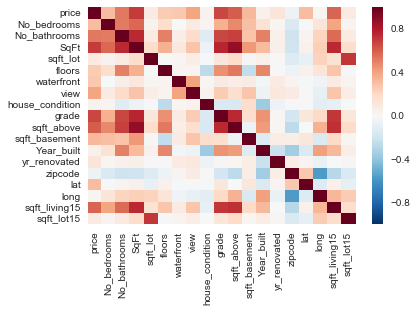

In [52]:
corr = data.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [53]:
select_cols = ['No_bedrooms','No_bathrooms','SqFt','house_condition','Year_built','price'] #creating a variable by name feature_cols

In [54]:
new_select_cols = data[select_cols]

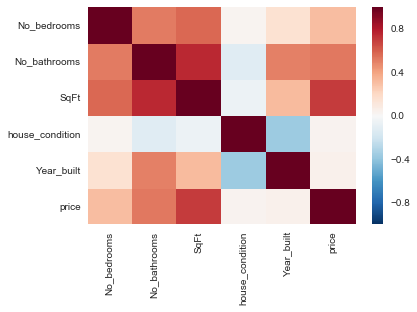

In [55]:
corr = new_select_cols.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


The above plot is the correlation matrix which is plotted graphically. 
Bright red means there is correlation of 1 where as Dark blue indicated negative correlation of 1.


In [12]:
#we are plotting the scatter plot between few dependent and independent variables.

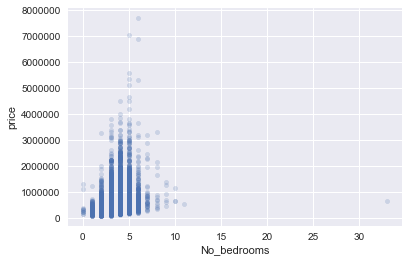

In [56]:
data.plot(kind='scatter',x='No_bedrooms',y='price',alpha=0.2) #scatter plot of number of bedroom vs price

This scatter plot does not look linear as number of bedrooms is a categorical variable. There is hetroskedacity in data which means a fanning effect is visible.

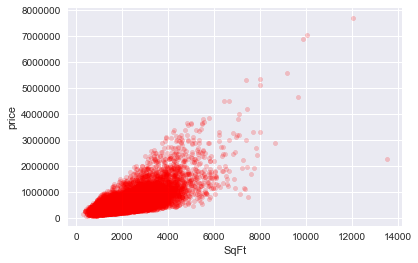

In [57]:
data.plot(kind='scatter',x='SqFt',y='price',color="Red",alpha=0.2) #scatter plot of number of bedroom vs price

This plot seems to have a normal relation between the x and y variable.

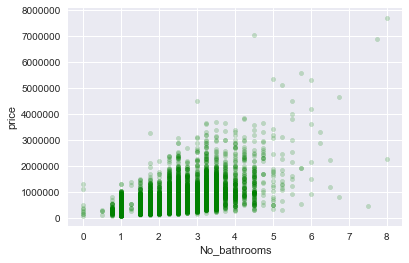

In [58]:
data.plot(kind='scatter',x='No_bathrooms',y='price',color="Green",alpha=0.2) #scatter plot of number of bedroom vs price

In [82]:
#In this plot we will plot the histogram of our target variable (y) which is house price

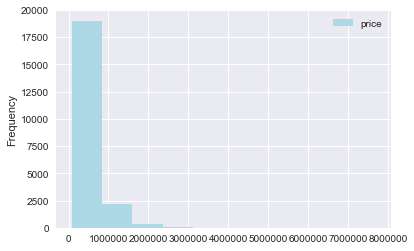

In [59]:
data.plot(kind='hist',y='price',color="lightBlue")

From the above histogram it is clearly visible that target variable is right skewed. Hence the error after fitting the model will be very large and the model will not work properly


In [60]:
feature_cols = ['No_bedrooms','No_bathrooms','SqFt','house_condition','Year_built'] #creating a variable by name feature_cols

In [61]:
x = data[feature_cols] #appending that variable to match with our data and creating x variables which are the predictor variables

In [62]:
y = data.price #our independent variable or target variable.

In [63]:
from sklearn.model_selection import train_test_split # importing the function from sklearb which splits data into training and test

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=36) #we are splitting data in the ratior 80:20/

In [65]:
from sklearn.linear_model import LinearRegression #importing the linear regression model

In [66]:
lm = LinearRegression() #creating an object of linear regression model

In [67]:
lm.fit(x_train,y_train) #runnign the model.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

Creating a data frame by concatenating the values of x and the regression coefficients.

In [70]:
coeff_df #printing the data frame

,Coefficient
No_bedrooms,-68587.050779
No_bathrooms,80790.997267
SqFt,295.190896
house_condition,12378.834909
Year_built,-2931.103552


Interpreting the coefficients:
1)No_bedrooms = -69070 ::  This shows that with a increase in bedroom the price decreases by 69070$
2)No_bathrooms = 81134 ::  This represents with a increase in bathroom the price increases by 81134$
3)SqFt = 302.85  :: With every 1sqft increase the price increases by 302$
4)House_condition = 11214 :: With increase in house condition(near to 4) there is increase in price by 11214$.
5)Year_built = -3019 :: As the year built increases the house price decreases by 3019$

In [73]:
y_pred = lm.predict(x_test) # we are predicting the values from the test dataset

In [74]:
result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

We have created a dataframe which has the actual values and the predicted values

In [109]:
result

,Actual,Predicted
id,,
2254501342,518000.0,2.130442e+05
8091410530,270000.0,3.959426e+05
3758900150,425000.0,4.930409e+05
3448900290,636230.0,6.276122e+05
686500030,650000.0,8.885889e+05
4458300190,875000.0,4.676328e+05
7950700120,279000.0,4.598905e+05
3526039101,622000.0,7.002424e+05
1921069059,250000.0,3.187716e+05


In [75]:
from sklearn import metrics #importing the function metrics from sklearn 

In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#Calculating the MAE,MSE,RMSE .

Mean Absolute Error: 161330.712308
Mean Squared Error: 65448493736.2
Root Mean Squared Error: 255829.032239


Since the histogram of the target variable is Right skewed we need to transform the target variable. Here we have used Logarithmic Transform.

In [77]:
y_new = np.log(data.price)

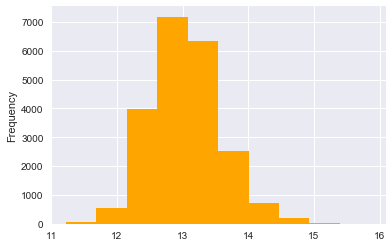

In [78]:
y_new.plot(kind='hist',y='price',color="Orange")

The above histogram of target variable price is now normal with high kurtosis 

In [79]:
x_train,x_test,y_log_train,y_log_test = train_test_split(x,y_new,test_size=0.2) 

we are diving the data again in training and test but with the y variable as log of price.

In [80]:
lm.fit(x_train,y_log_train) #Running the model with log(price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

In [83]:
coeff_df #The coefficients of the regression

,Coefficient
No_bedrooms,-0.072440
No_bathrooms,0.151357
SqFt,0.000386
house_condition,0.028916
Year_built,-0.003796


Interpreting the coefficients:
1)No_bedrooms = -0.07 ::  This shows that with a increase in no of bedroom the price decreases by 0.07%
2)No_bathrooms = 0.148 ::  This represents with a increase in no of bathroom the price increases by 0.148%
3)SqFt = 0.0003  :: With every 1sqft increase the price increases by 0.0003%
4)House_condition=0.026 :: With increase in house condition(near to 4) there is increase in price by 0.026%.
5)Year_built = -0.0038 :: As the year built increases the house price decreases by 0.0038%.

In [84]:
y_log_pred = lm.predict(x_test) #Predicting the values of the test data set

In [85]:
new_result = pd.DataFrame({'Actual':y_log_test,'Predicted':y_log_pred})

In [86]:
new_result

,Actual,Predicted
id,,
2616800480,13.493927,13.598572
4217401195,13.732129,13.356935
4406000050,12.323856,12.505632
6448000090,14.269766,13.634874
8005100571,12.278393,12.938485
5451300105,13.864301,13.594088
2426039313,12.533576,12.569503
6601200250,12.230765,12.795175
3629790160,13.169724,12.872157


In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_log_test,y_log_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_log_test,y_log_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_log_test,y_log_pred)))



Mean Absolute Error: 0.285469232859
Mean Squared Error: 0.124939039884
Root Mean Squared Error: 0.353467169457


In [88]:
Residuals = new_result.Actual - new_result.Predicted #calculating the residuals which is error (Actual - predicted).

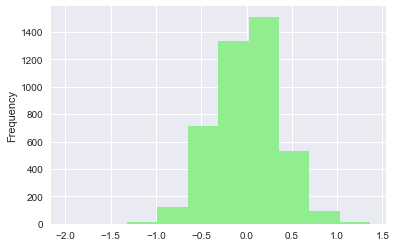

In [89]:
 Residuals.plot(kind='hist',y='Residuals',color="lightgreen")

This gives a normally distributed histogram of the residual or error which is a important aspect in deciding the worth of the regression model. Accuracy of the model.


In [33]:
##BASIC NUMPY OPERATIONS


In [34]:
import numpy as np

In [35]:
#Sorting in Numpy

In [36]:
ages = np.random.randint(low=20, high=40, size = 10)
weights = np.random.randint(low=150, high=200, size=10)

print(ages)
print(weights)

[20 20 37 37 39 34 20 24 22 29]
[182 156 173 184 179 185 193 196 154 158]


In [37]:
# Now we will sort the ages array first and use that sorter to sort the corresponding weights array
sorter = np.argsort(ages)
print(ages[sorter])
print(weights[sorter])

[20 20 20 22 24 29 34 37 37 39]
[182 156 193 154 196 158 185 173 184 179]


In [38]:
#Matrix multiplication

In [39]:
a = np.array([[1,2,3,4],[5,6,7,8]]) #creating an array 

In [40]:
b = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

In [41]:
c = np.matmul(a, b)# To find matrix product

In [42]:
c

array([[ 70,  80,  90],
       [158, 184, 210]])

In [43]:
#TRANSPOSE

In [44]:
m = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
m

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [45]:
m.T
# displays the following result:

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [47]:
##PANDAS Basic operations #######

In [49]:
import pandas as pd

In [50]:
S = pd.Series([11, 28, 72, 3, 5, 8])
S

0    11
1    28
2    72
3     3
4     5
5     8
dtype: int64

In [51]:
print(S.index) #Greaping by index

RangeIndex(start=0, stop=6, step=1)


In [52]:
print(S.values) #Greaping by values

[11 28 72  3  5  8]


In [53]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df

,coverage,name,reports,year
Cochice,25,Jason,4,2012
Pima,94,Molly,24,2012
Santa Cruz,57,Tina,31,2013
Maricopa,62,Jake,2,2014
Yuma,70,Amy,3,2014


In [54]:
capitalizer = lambda x: x.upper() #Create a capitalization lambda function

In [55]:
#Apply the capitalizer function over the column ‘name'

In [56]:
df['name'].apply(capitalizer)

Cochice       JASON
Pima          MOLLY
Santa Cruz     TINA
Maricopa       JAKE
Yuma            AMY
Name: name, dtype: object

In [58]:
df_groupby = list(df.groupby('year'))

In [59]:
df_groupby

[(2012,          coverage   name  reports  year
  Cochice        25  Jason        4  2012
  Pima           94  Molly       24  2012),
 (2013,             coverage  name  reports  year
  Santa Cruz        57  Tina       31  2013),
 (2014,           coverage  name  reports  year
  Maricopa        62  Jake        2  2014
  Yuma            70   Amy        3  2014)]